## Deriving New Variables

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os

#### New variables

In [5]:
#### 1. Sort products in your ords_prods_merged dataframe according to price

#If the item’s price is lower than or equal to $5, it will be labeled as a “low-range product.”
#If the item’s price is above $5 but lower than or equal to $15, it will be labeled as a “mid-range product.”
#If the item’s price is above $15, it will be labeled as a “high-range product.”


In [11]:
# importing ords_prods_merged dataframe
path = r'C:\Users\efens\cf_tasks\2023-07 Instacard Basket Analysis'
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', '022 Prepared Data', 'orders_products_merged.pkl'))

In [15]:
# creating a subset for first one million rows
df = ords_prods_merged[:1000000] # [0:] > all numbers above 0; [:1] > all numbers below 1

In [19]:
# defining conditions filters

def price_label(row): # define + title (argument telling the function to look at each row within the dataframe)

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data' # e.g., missing values

In [20]:
# use the function on the data set

df['price_range'] = df.apply(price_label, axis=1)

C:\Users\efens\AppData\Local\Temp\ipykernel_10392\196390045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [22]:
# counting values 

df['price_range'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [28]:
# checking the information about "prices" variale

pd.options.display.float_format = '{:.2f}'.format
df['prices'].describe()

count   1000000.00
mean          7.82
std           3.64
min           1.00
25%           6.30
50%           9.00
75%          10.30
max          14.80
Name: prices, dtype: float64

In [27]:
df['prices'].max()

14.8

#### If-Statements with the loc() Function

In [30]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [31]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [32]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [41]:
df['price_range_loc'].value_counts(dropna = False)

Mid-range product    756450
Low-range product    243550
Name: price_range_loc, dtype: int64

- if = df.loc[df['prices'] > 15,
- then = 'price_range_loc'] = 'High-range product'

#### Using loc() function on the whole df 

In [36]:
ords_prods_merged.loc[ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [37]:
ords_prods_merged.loc[(ords_prods_merged['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [38]:
ords_prods_merged.loc[ords_prods_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [40]:
ords_prods_merged['price_range_loc'].value_counts(dropna = False)

NaN                   21104410
Low-range product     10126321
Mid-range product       756450
High-range product      417678
Name: price_range_loc, dtype: int64

#### If-Statements with For-Loops

In [47]:
# How busy each day is?

ords_prods_merged['orders_day_of_week'].value_counts(dropna=False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [54]:
# Creating and running a for-loop
# that will contain one of three different values: “Busiest day,” “Least busy,” and “Regularly busy.”

result = []

for value in ords_prods_merged["orders_day_of_week"]:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [53]:
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [56]:
# creating a column 

ords_prods_merged['busiest_day'] = result

In [57]:
ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

In [58]:
ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day
0,2539329,1,prior,1,2,8,7.00,196,1,0,Soda,77,7,9.00,both,Mid-range product,Regularly busy
1,2398795,1,prior,2,3,7,15.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy
2,473747,1,prior,3,3,12,21.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy
3,2254736,1,prior,4,4,7,29.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy
4,431534,1,prior,5,4,15,28.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy


## Answering questions

### 01. How busy each day is?

In [62]:
ords_prods_merged['orders_day_of_week'].value_counts(dropna=False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

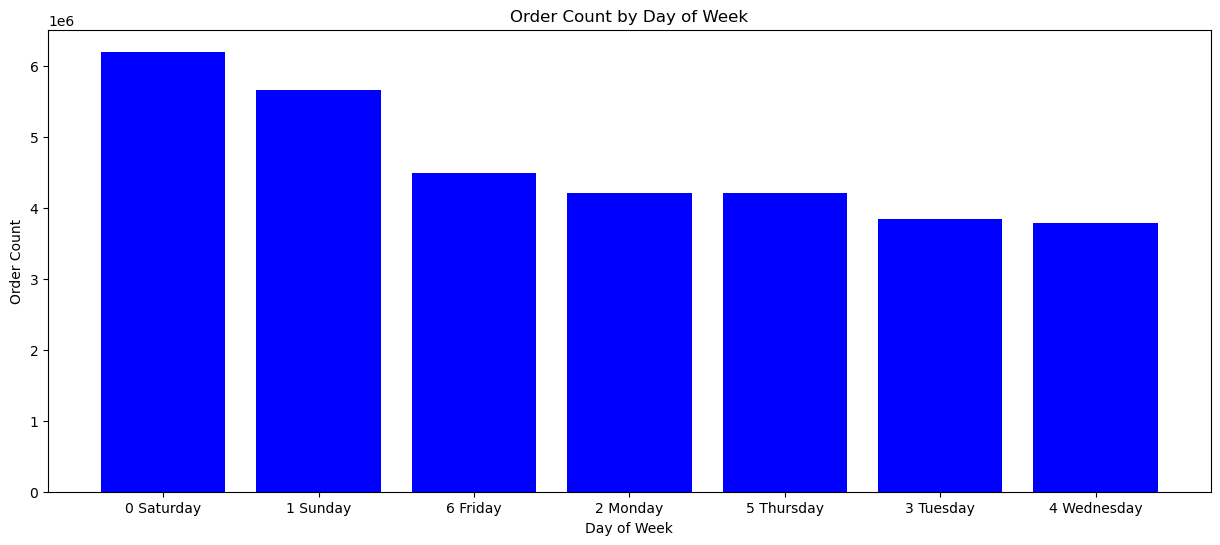

In [106]:
## Visualization of the data

import matplotlib.pyplot as plt

# Data
data = {
    'Day of Week': [0, 1, 6, 2, 5, 3, 4],
   'Order Count': [6204182, 5660230, 4496490, 4213830, 4205791, 3840534, 3783802]
}

# Map original numbering to day names
day_names = ['0 Saturday', '1 Sunday', '2 Monday', '3 Tuesday', '4 Wednesday', '5 Thursday', '6 Friday']
data['Day of Week'] = [day_names[day] for day in data['Day of Week']]

# Set the width of the plot
plt.figure(figsize=(15, 6)) 


# Create a bar chart
plt.bar(data['Day of Week'], data['Order Count'], color='blue')

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Order Count')
plt.title('Order Count by Day of Week')

# Show the plot
plt.show()

### 02. Creating  a “busiest_days” column

In [109]:
# Creating and running a for-loop
# that will contain one of two different values: “Busiest day,” “Least busy,” and “Regularly busy.”

result = []

for value in ords_prods_merged["orders_day_of_week"]:
    if value == 0 or value == 1:
        result.append("Busiest days")
    elif value == 3 or value == 4:
        result.append("Least busiest days")
    else:
        result.append("Regularly busy")

In [77]:
ords_prods_merged['busiest_days'] = result

In [78]:
ords_prods_merged['busiest_days'].value_counts(dropna = False)

Regularly busy        12916111
Busiest days          11864412
Least busiest days     7624336
Name: busiest_days, dtype: int64

In [111]:
ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,prior,1,2,8,7.00,196,1,0,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,prior,2,3,7,15.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Least busiest days,Average orders
2,473747,1,prior,3,3,12,21.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Least busiest days,Average orders
3,2254736,1,prior,4,4,7,29.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy,Least busiest days,Average orders
4,431534,1,prior,5,4,15,28.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy,Least busiest days,Most orders


In [89]:
ords_prods_merged['busiest_days'].describe()

count           32404859
unique                 3
top       Regularly busy
freq            12916111
Name: busiest_days, dtype: object

### 03. Checking the visualization

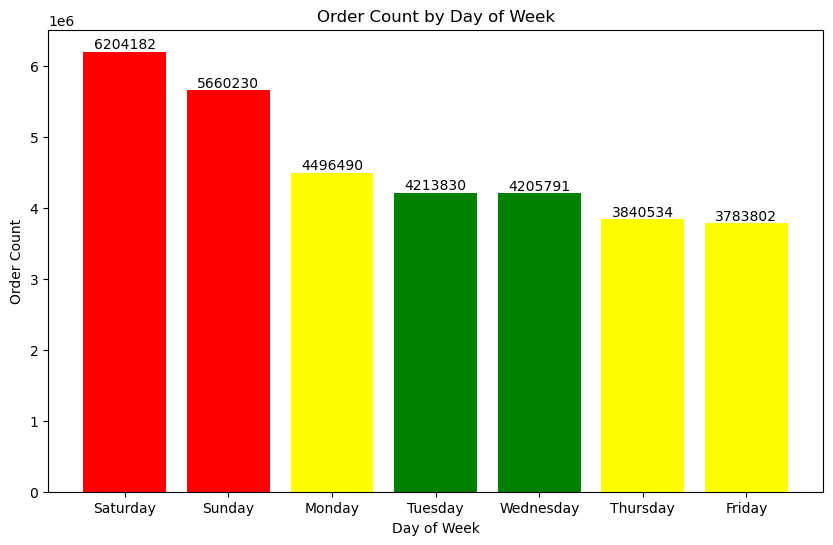

In [92]:
# Data with original numbering
data = {
    'Day of Week': [0, 1, 2, 3, 4, 5, 6],  # 0 represents Saturday, 1 represents Sunday, and so on
    'Order Count': [6204182, 5660230, 4496490, 4213830, 4205791, 3840534, 3783802]
}

# Map original numbering to day names
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
data['Day of Week'] = [day_names[day] for day in data['Day of Week']]

# Determine colors for each category
result = []
for value in data["Day of Week"]:
    if value in ["Saturday", "Sunday"]:
        result.append("red")  # Busiest days
    elif value in ["Tuesday", "Wednesday"]:
        result.append("green")  # Least busiest days
    else:
        result.append("yellow")  # Regularly busy

# Set the width of the plot
plt.figure(figsize=(10, 6))

# Create a bar chart with colors
bars = plt.bar(data['Day of Week'], data['Order Count'], color=result)

# Add labels and title
plt.xlabel('Day of Week')
plt.ylabel('Order Count')
plt.title('Order Count by Day of Week')

# Add values on top of each bar
for bar, count in zip(bars, data['Order Count']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(count), ha='center', va='bottom')

# Show the plot
plt.show()


### 04. Note any observations in markdown format.

In [97]:
x=(12916111 - 11864412)/32404859*100
x

3.245497843394412

In [93]:
ords_prods_merged['busiest_days'].shape

(32404859,)

From the data, it can be concluded that the most frequent number of orders was made on weekends (Saturday and Sunday). In the data, they are marked as "Busiest days." On the other hand, the highest number of orders was made on Thursdays and Fridays, which are marked as "Least busiest days." It is also worth noting that the difference between the two most busy days (11,864,412) and the "Regularly busy" days (12,916,111) is only 3.24% relative to the total number of orders.

### 05. Creating a “busiest_period_of_day” column

TASK: Create a column that will contains periods of time labeled “Most orders,” “Average orders,” and “Fewest orders.”

In [100]:
# Exploring order_hour_of_day variable

ords_prods_merged['order_hour_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [101]:

ords_prods_merged['order_hour_of_day'].describe()

count   32404859.00
mean          13.43
std            4.25
min            0.00
25%           10.00
50%           13.00
75%           16.00
max           23.00
Name: order_hour_of_day, dtype: float64

1. If hours are 10,11,14,15,13,14,16,9 that it is Most orders
2. If houts are 17,8,18,19,20,7,21,22,23 --> Average orders
3. 6,0,1,5,2,4,3 --> Fewest orders

In [108]:
# Creating a loop

result_1 = []

for value in ords_prods_merged["order_hour_of_day"]:
    if value in [10,11,14,15,13,14,16,9]:
        result_1.append("Most orders")
    elif value in [6,0,1,5,2,4,3]:
        result_1.append("Fewest orders")
    else:
        result_1.append("Average orders")

In [114]:
# Create a column busiest_period_of_day
ords_prods_merged['busiest_period_of_day'] = result_1

### 06. Print the frequency 

In [112]:
# Printing the frequency
ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

Most orders       18499539
Average orders    13018499
Fewest orders       886821
Name: busiest_period_of_day, dtype: int64

In [115]:
ords_prods_merged.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,prior,1,2,8,7.00,196,1,0,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,prior,2,3,7,15.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Least busiest days,Average orders
2,473747,1,prior,3,3,12,21.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Least busiest days,Average orders
3,2254736,1,prior,4,4,7,29.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy,Least busiest days,Average orders
4,431534,1,prior,5,4,15,28.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy,Least busiest days,Most orders


## Export the df

In [117]:
# Export changed df 

ords_prods_merged.to_pickle(os.path.join(path, '02 Data','022 Prepared Data', 'ords_prods_merged_new_columns.pkl'))

## Texting

In [118]:
ords_prods_merged_new = pd.read_pickle(os.path.join(path, '02 Data', '022 Prepared Data', 'ords_prods_merged_new_columns.pkl'))

In [120]:
ords_prods_merged_new.shape

(32404859, 19)

In [122]:
ords_prods_merged_new.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,2539329,1,prior,1,2,8,7.00,196,1,0,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,prior,2,3,7,15.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Least busiest days,Average orders
2,473747,1,prior,3,3,12,21.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Least busiest days,Average orders
3,2254736,1,prior,4,4,7,29.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy,Least busiest days,Average orders
4,431534,1,prior,5,4,15,28.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy,Least busiest days,Most orders
